In [1]:
#libraries
# Data
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesing & modelling 
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import data
# ==============================================================================
data = pd.read_csv("wine.csv")
print(data.describe())
print(data.info())
target = data['class'].tolist()

            class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

Text(0.5, 1.0, "Pearson's Correlation")

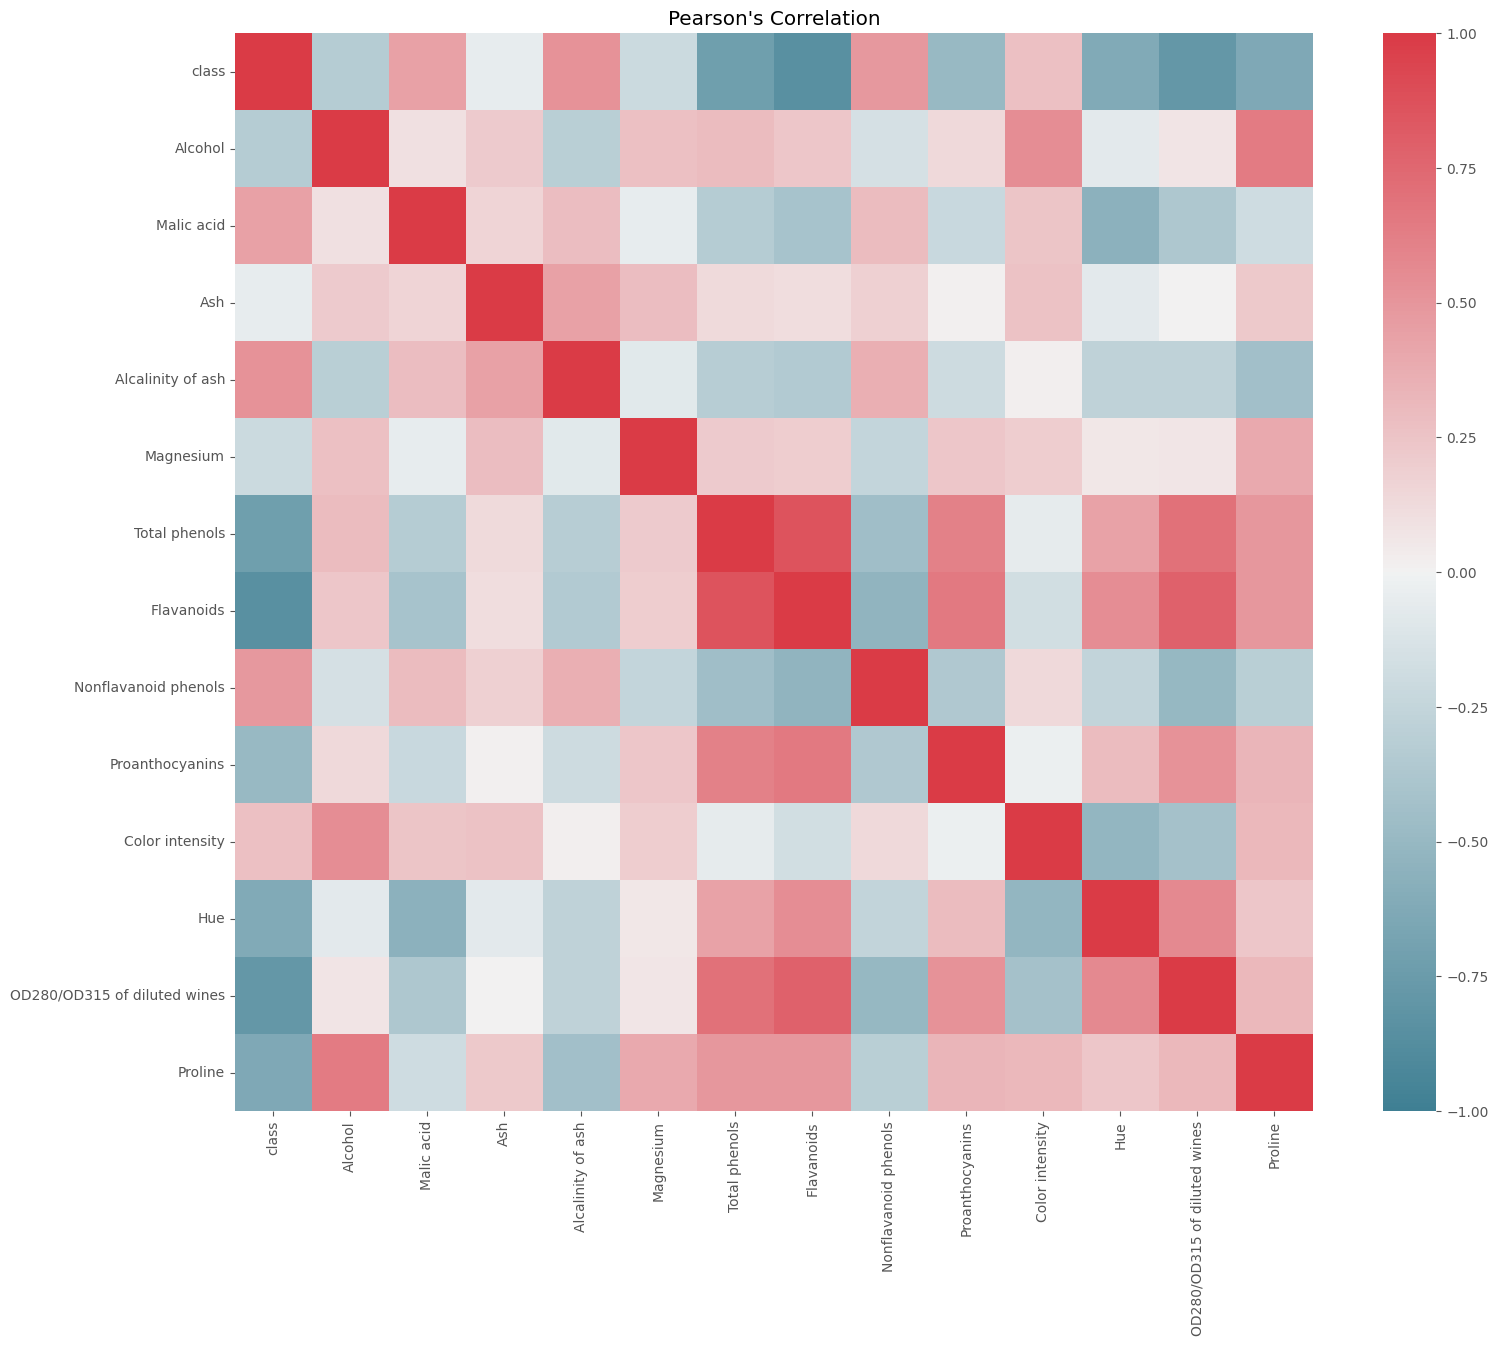

In [3]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(18, 14))
corr = data.corr()
sns_plot = sns.heatmap(corr, mask=np.zeros_like(corr,dtype=bool),
                       cmap=sns.diverging_palette(220, 10, as_cmap=True),
                       square=True, ax=ax,vmin=-1,vmax=1)
plt.title("Pearson's Correlation")


#sns_plot = sns.clustermap(my_df)
plt.title("Pearson's Correlation")

In [4]:
# clean & see
df = data.drop('class', axis=1)
#normalize data
data = (df - df.min()) / (df.max() - df.min())

#scaler = MinMaxScaler()
#model = scaler.fit(df)
#db = model.transform(df)
#data = pd.DataFrame(df)
print(data.head(1))
print('')
print('Mean:')
print(data.mean(axis=0))
print('')
print('Variance:')
print(data.var(axis=0))
data.describe()

    Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  0.842105      0.1917  0.572193           0.257732   0.619565   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.627586     0.57384              0.283019          0.59306   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0         0.372014  0.455285                      0.970696  0.561341  

Mean:
Alcohol                         0.518584
Malic acid                      0.315484
Ash                             0.538244
Alcalinity of ash               0.458502
Magnesium                       0.323278
Total phenols                   0.453487
Flavanoids                      0.356386
Nonflavanoid phenols            0.437460
Proanthocyanins                 0.372523
Color intensity                 0.322363
Hue                             0.388170
OD280/OD315 of diluted wines    0.491460
Proline                         0.334446
dtype: float64

Variance:
Alcohol       

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, "Pearson's Correlation")

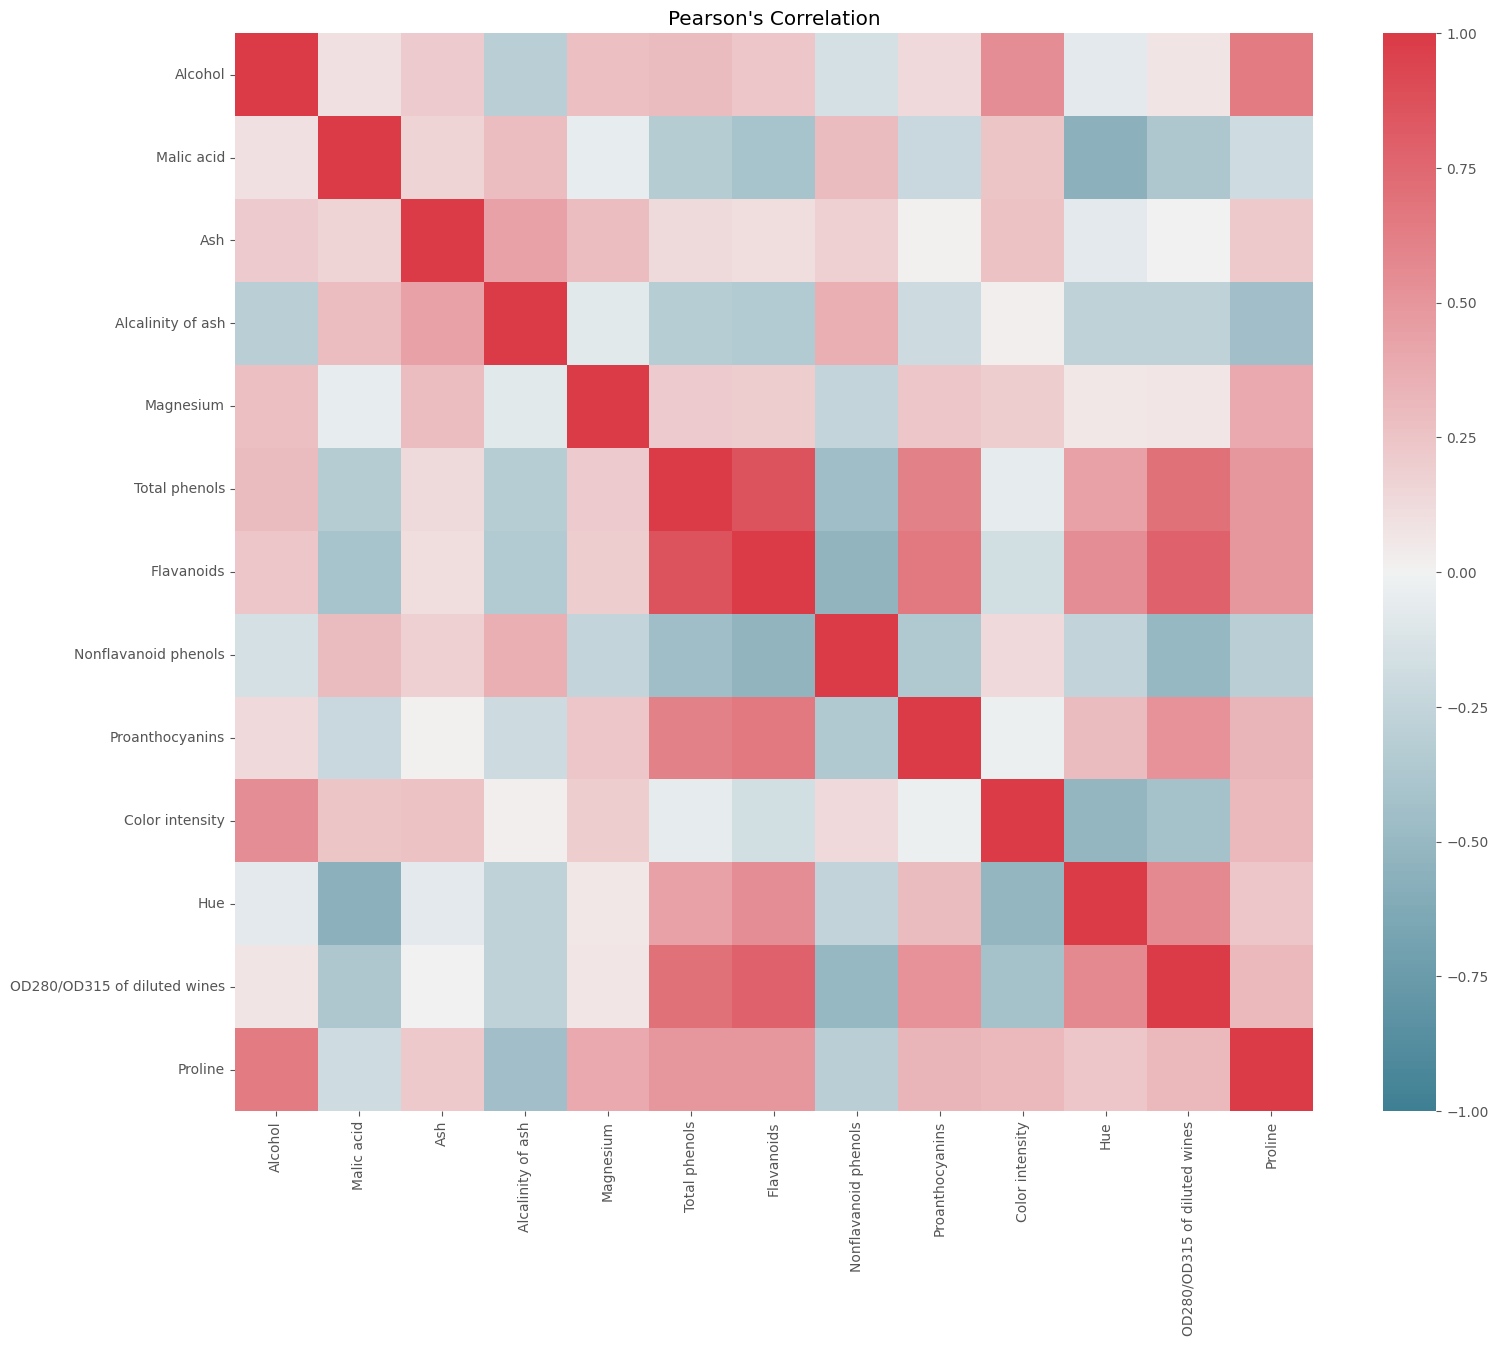

In [5]:
# run correlation matrix and plot
f2, ax2 = plt.subplots(figsize=(18, 14))
corr2 = data.corr()
sns_plot2 = sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=bool),
	cmap=sns.diverging_palette(220, 10, as_cmap=True),
	square=True, ax=ax2,vmin=-1,vmax=1)
plt.title("Pearson's Correlation")
#sns_plot = sns.clustermap(data)

Text(0.5, 1.0, "Spearman's Correlation")

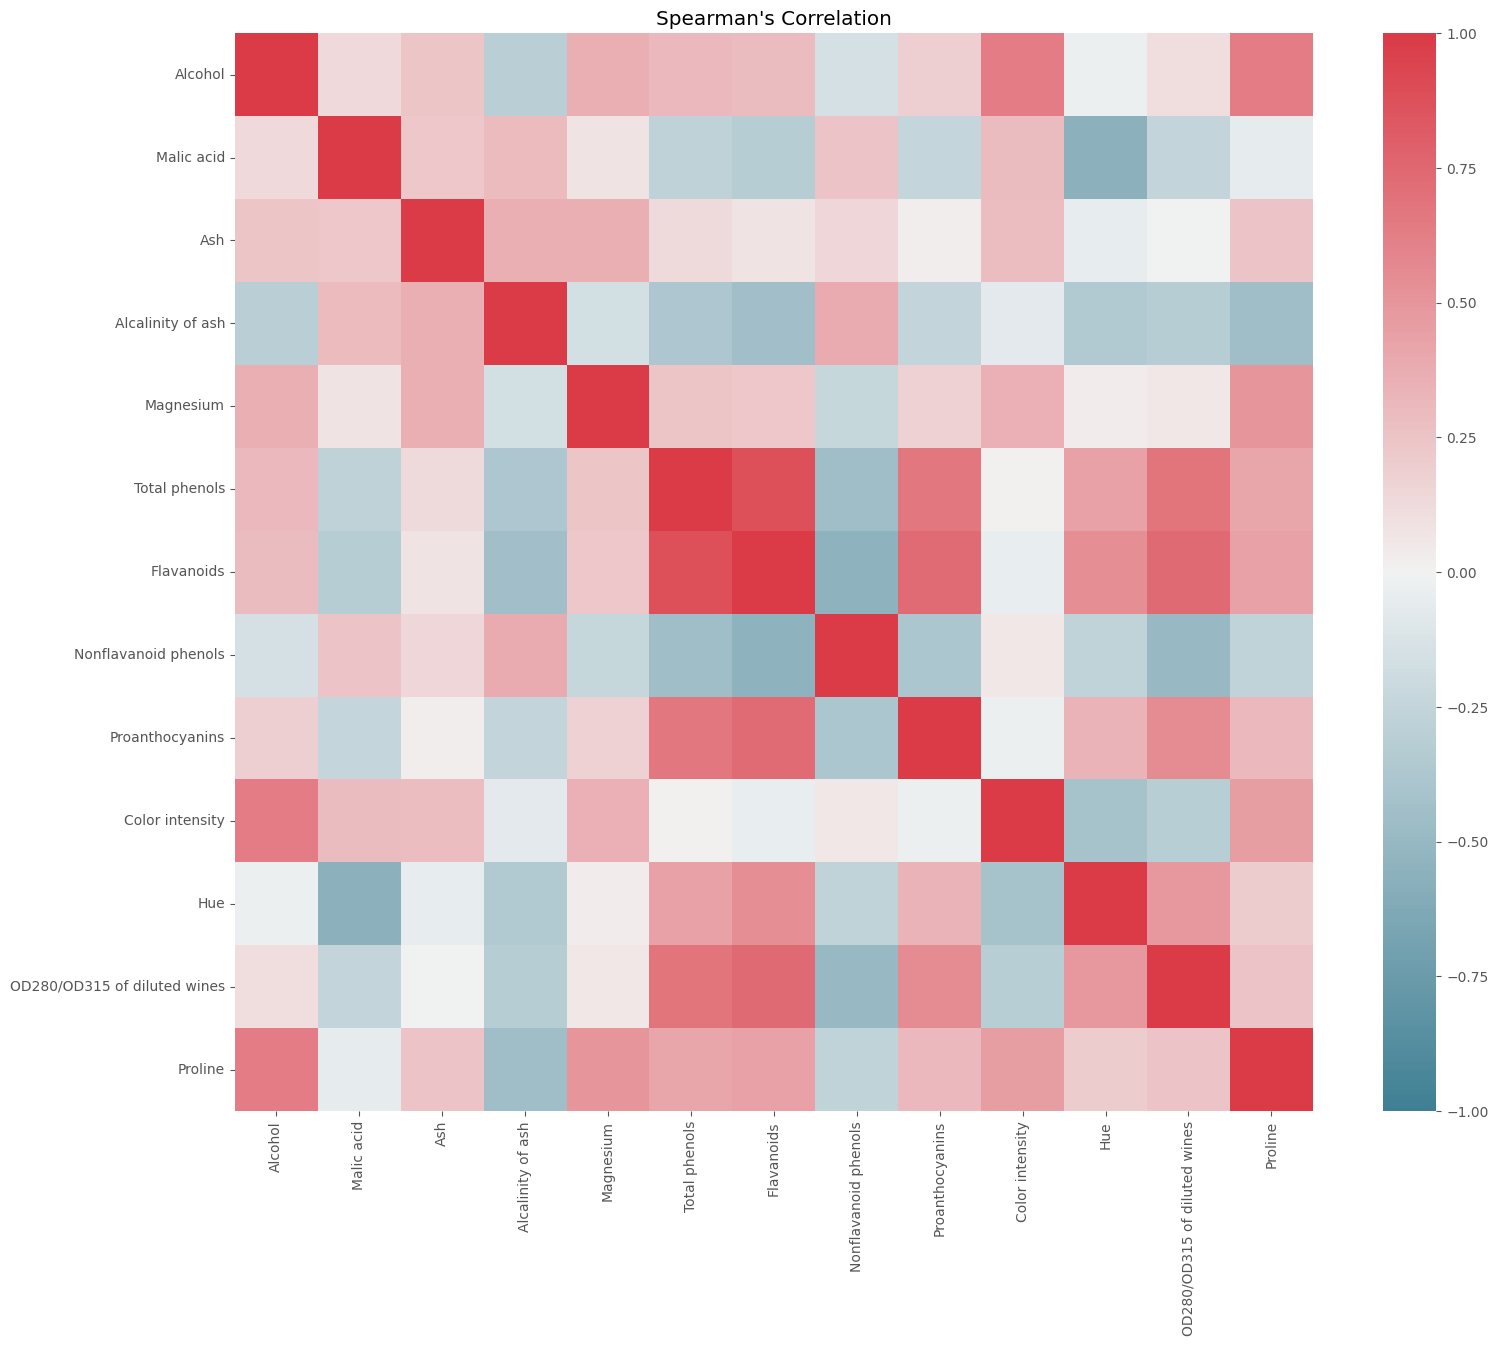

In [6]:
# run correlation matrix and plot
f3, ax3 = plt.subplots(figsize=(18, 14))
corr3 = data.corr(method="spearman")
sns_plot3 = sns.heatmap(corr3, mask=np.zeros_like(corr3, dtype=bool),
	cmap=sns.diverging_palette(220, 10, as_cmap=True),
	square=True, ax=ax3,vmin=-1,vmax=1)
plt.title("Spearman's Correlation")

Text(0.5, 1.0, "Kendall's Correlation")

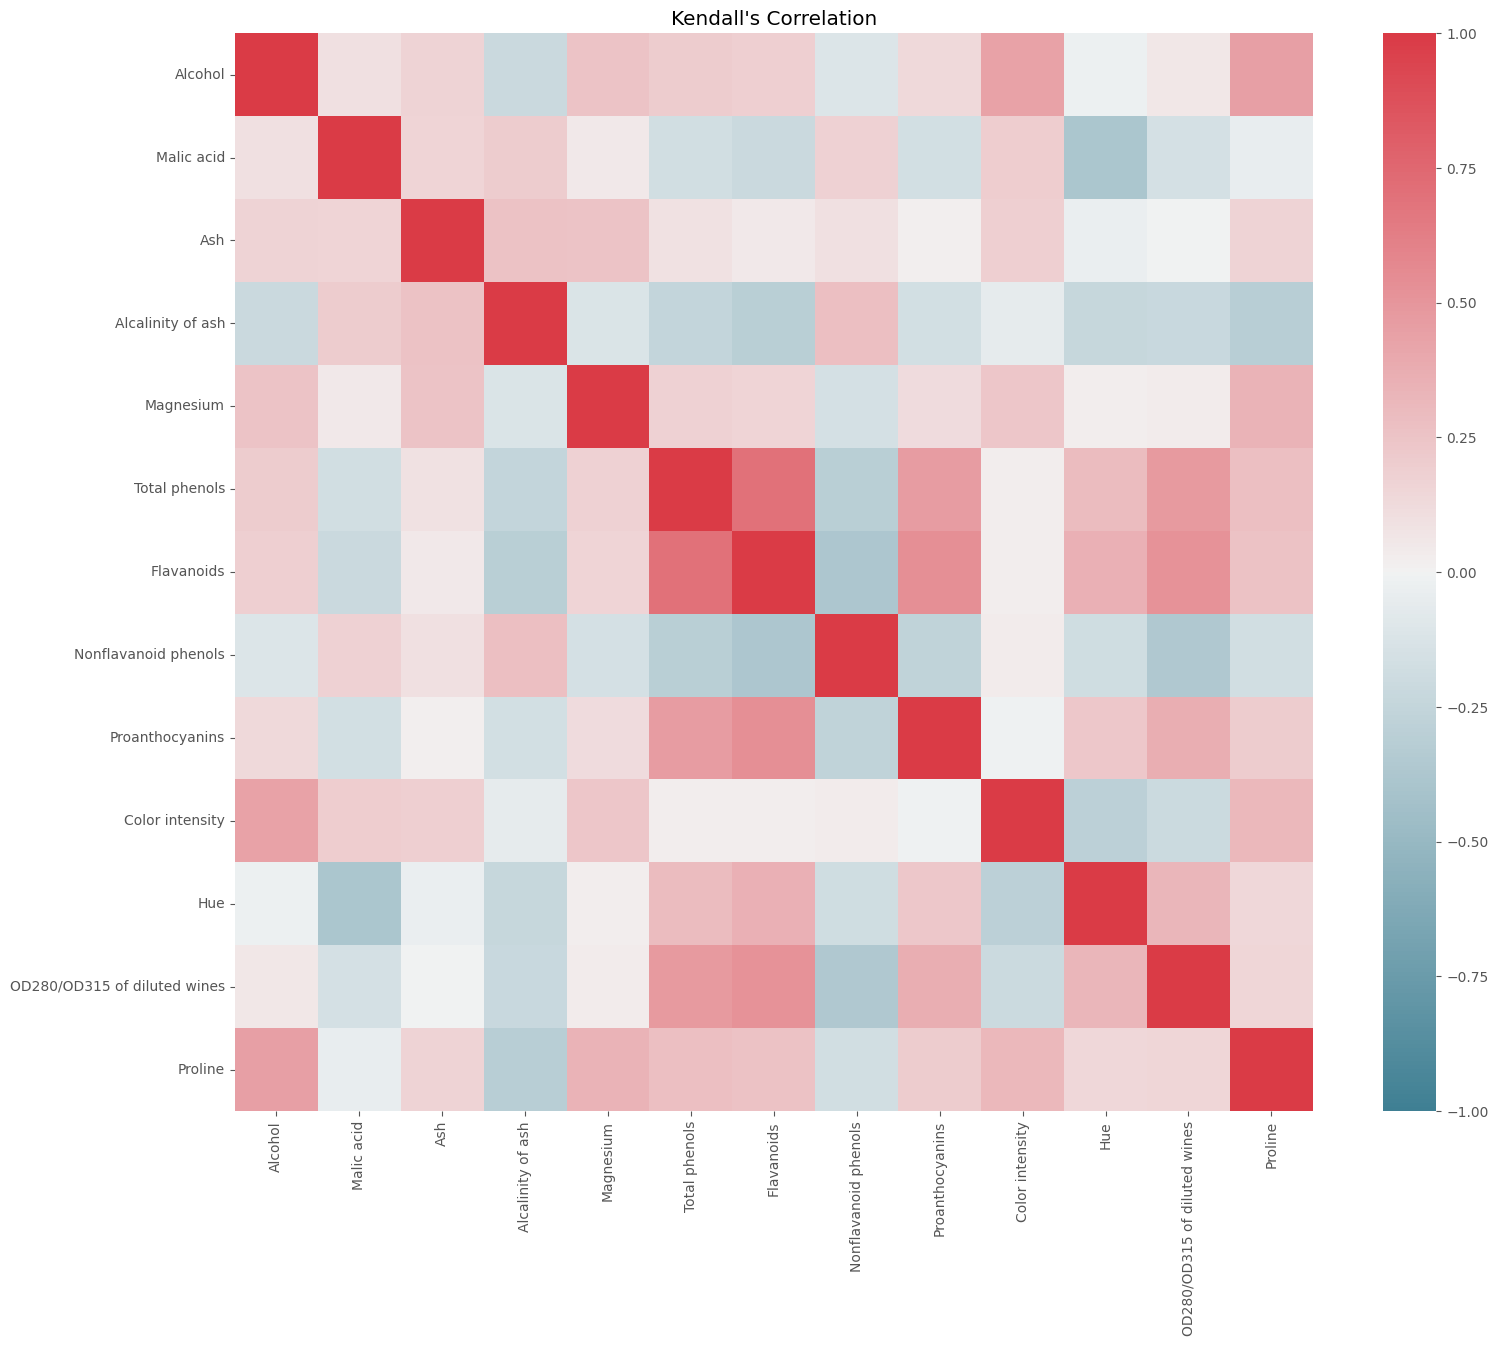

In [7]:
# run correlation matrix and plot
f4, ax4 = plt.subplots(figsize=(18, 14))
corr4 = data.corr(method="kendall")
#~ print(corr4)
sns_plot4 = sns.heatmap(corr4, mask=np.zeros_like(corr4, dtype=bool),
	cmap=sns.diverging_palette(220, 10, as_cmap=True),
	square=True, ax=ax4,vmin=-1,vmax=1)
plt.title("Kendall's Correlation")

In [9]:
#PCA training
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)

# Se extrae el modelo entrenado del pipeline
model_pca = pca_pipe.named_steps['pca']



# array to dataframe to add names.
dat=pd.DataFrame(
    data    = model_pca.components_,
    columns = data.columns,
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
)

print(dat)

     Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0   0.144329   -0.245188 -0.002051          -0.239320   0.141992   
1   0.483652    0.224931  0.316069          -0.010591   0.299634   
2  -0.207383    0.089013  0.626224           0.612080   0.130757   
3  -0.017856    0.536890 -0.214176           0.060859  -0.351797   
4  -0.265664    0.035214 -0.143025           0.066103   0.727049   
5   0.213539    0.536814  0.154475          -0.100825   0.038144   
6  -0.056396    0.420524 -0.149171          -0.286969   0.322883   
7   0.396139    0.065827 -0.170260           0.427970  -0.156361   
8  -0.508619    0.075283  0.307694          -0.200449  -0.271403   
9   0.211605   -0.309080 -0.027125           0.052799   0.067870   
10 -0.225917    0.076486 -0.498691           0.479314   0.071289   
11 -0.266286    0.121696 -0.049622          -0.055743   0.062220   
12  0.014970    0.025964 -0.141218           0.091683   0.056774   

    Total phenols  Flavanoids  Nonflavanoid phe

Text(0.5, 1.0, 'PCA components')

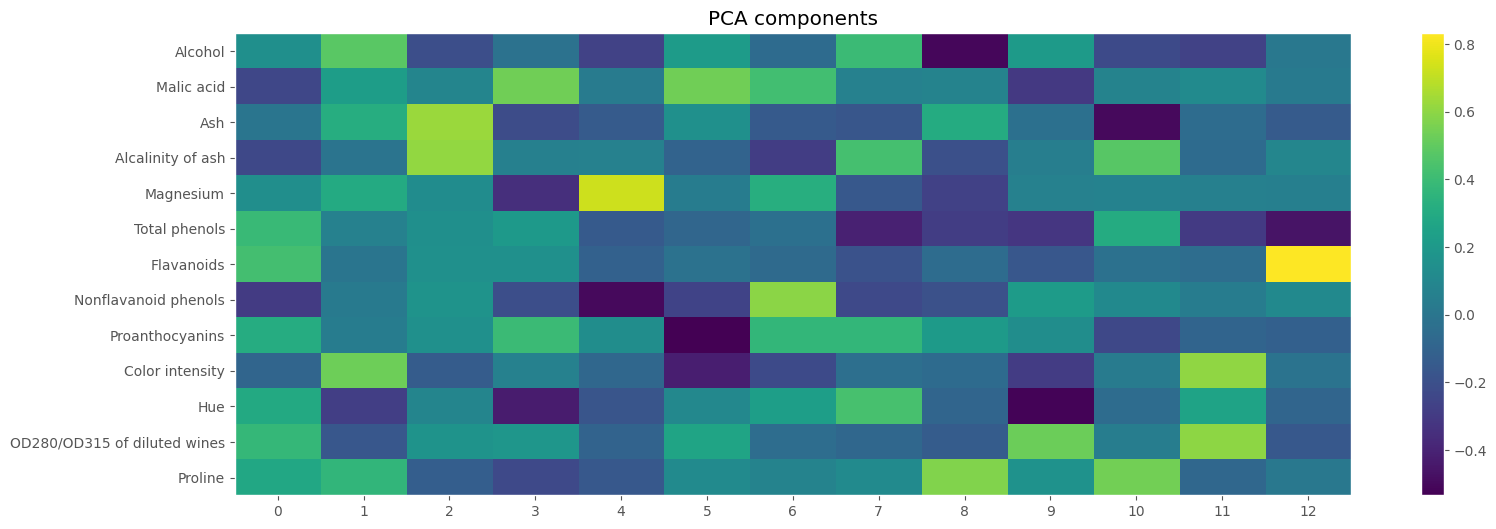

In [10]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
components = model_pca.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), dat.index)
plt.grid(False)
plt.colorbar();
plt.title("PCA components")
#fig.savefig("output_pca.png")


[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


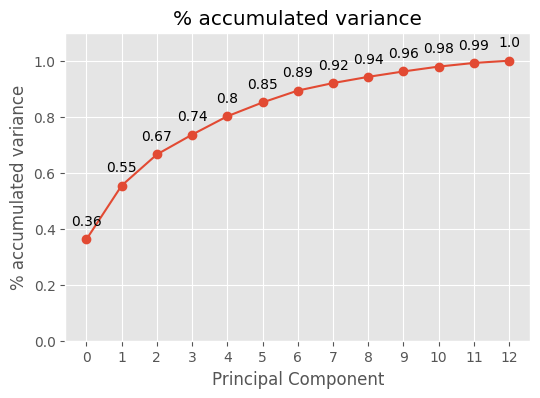

In [11]:
# % accumulated variance
# ==============================================================================
prop_variance_acum = model_pca.explained_variance_ratio_.cumsum()
print(prop_variance_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_variance_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, prop_variance_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_xticklabels(dat.index)
ax.set_title('% accumulated variance')
ax.set_xlabel('Principal Component')
ax.set_ylabel('% accumulated variance');

fig.savefig("output_pca1.png")

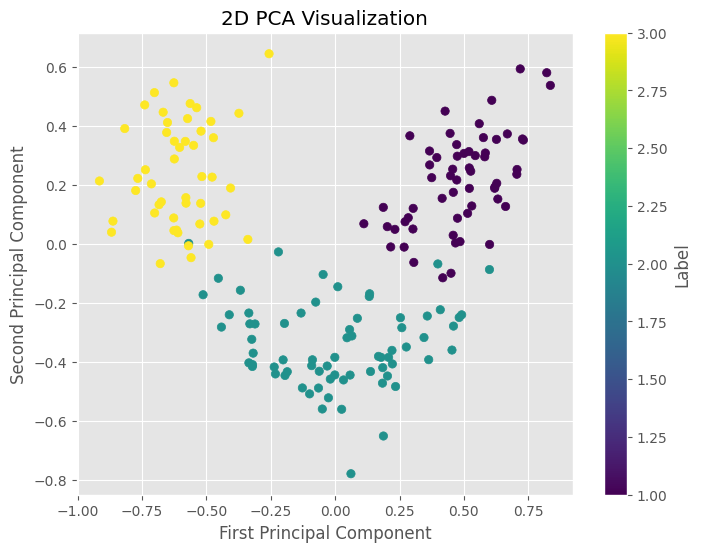

In [12]:
# Fit PCA to the data and transform it
pca_res = model_pca.fit_transform(data)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_res[:, 0], pca_res[:, 1], c=target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Visualization')
plt.colorbar(scatter, label='Label') # Add a color bar for reference
plt.grid(True)
plt.show()